In [1]:
import numpy as np
from tensorflow.keras import Sequential, layers
from tensorflow.data import Dataset
import matplotlib.pyplot as plt

#### Определяем функцию, которую будем прогнозировать
y = sin(x) * exp(-x)

In [2]:
func = lambda x: np.sin(x) * np.cos(x * 0.5) * np.exp(-x * 0.05)

In [3]:
length = 1000
x_length = 10

x_arr = np.arange(length) / x_length
y_arr = func(x_arr)

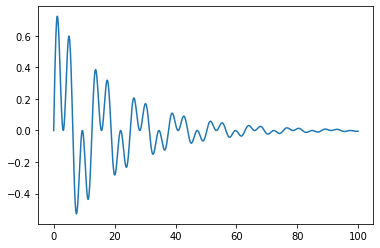

In [4]:
plt.plot(x_arr, y_arr)

#### Создаём датасет для модели

In [5]:
train_length = int(0.7 * length)
test_length = length - train_length

input_interval = 20
output_offset = 10

datasets_train = []
labels_train = []
for i in range(train_length - output_offset - input_interval):
    data = []
    for k in range(i, i + input_interval):
        data.append(y_arr[k])
    datasets_train.append(data)
    labels_train.append([y_arr[k + output_offset]])
datasets_train = np.array(datasets_train)
labels_train = np.array(labels_train)

datasets_test = []
labels_test = []
for i in range(train_length, train_length + test_length - output_offset - input_interval):
    data = []
    for k in range(i, i + input_interval):
        data.append(y_arr[k])
    datasets_test.append(data)
    labels_test.append([y_arr[k + output_offset]])
datasets_test = np.array(datasets_test)
labels_test = np.array(labels_test)


In [6]:
BATCH_SIZE = 10
BUFFER_SIZE = 1000

train_univariate = Dataset.from_tensor_slices((datasets_train, labels_train))
train_univariate = train_univariate.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = Dataset.from_tensor_slices((datasets_test, labels_test))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [7]:
model = Sequential()

model.add(layers.Dense(input_interval, input_shape=(input_interval,)))
model.add(layers.Dense(input_interval))
model.add(layers.Dense(int(input_interval / 2)))
model.add(layers.Dense(1))

model.compile(optimizer='nadam', loss='mean_squared_error')

In [8]:
model.fit(
    train_univariate,
    epochs=200,
    steps_per_epoch=10,
    validation_data=val_univariate,
    validation_steps=10
)

Epoch 1/200
10/10 [==============================] - 1s 28ms/step - loss: 0.0196 - val_loss: 7.4952e-05
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0151 - val_loss: 2.4667e-04
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0101 - val_loss: 2.5660e-04
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 8.2601e-05
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0189 - val_loss: 1.2978e-04
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 3.6819e-05
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 8.5219e-05
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 3.1987e-05
Epoch 9/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 3.7923e-05
Epoch 10/200
10/10 [==============================] - 0s 4ms/step - loss

In [9]:
train_predictions = np.array([value[0] for value in model.predict(datasets_train)])
train_labels_ = np.array([value[0] for value in labels_train])
train_x_arr = x_arr[input_interval + output_offset:train_length]

test_predictions = np.array([value[0] for value in model.predict(datasets_test)])
test_labels_ = np.array([value[0] for value in labels_test])
test_x_arr = x_arr[train_length + input_interval + output_offset:]

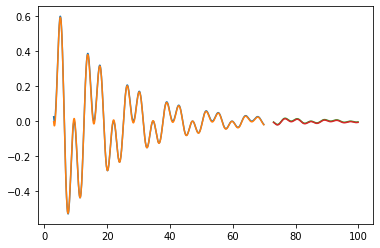

In [10]:
plt.plot(train_x_arr, train_labels_)
plt.plot(train_x_arr, train_predictions)

plt.plot(test_x_arr, test_labels_)
plt.plot(test_x_arr, test_predictions)